In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
paths_list = ["../data/g/data_G", 
              "../data/g/data_G_dropped_samples",
              "../data/f/data_F",
              "../data/f/data_F_dropped_samples",
              "../data/o/data_O",
              "../data/o/data_O_dropped_samples",
             ]

In [13]:
for path in paths_list:
    data = load_path(path)
    np.save(path, data_pca)

In [ ]:
x или 1 если x = 0

In [29]:
def upd_x(x):
    if x == 0:
        return 1
    else:
        return x

In [148]:
def load_path(path, v = 0):
    data = pd.read_csv(path, index_col=0)
    mask = data.values[:, 1:].sum(1) != 0
    
    if v: print(data.values[mask].shape)
    
    data_filtered = data.values[mask][:, 1:]
    
    data_norm = data_filtered/ np.array([upd_x(x) for x in data_filtered.sum(1)]).reshape(-1,1)
    
    return data_norm

In [149]:
def do_PCA(data):
    pca = PCA()
    pca.fit(data)
    
    explained_var = []
    for i in range(len(pca.explained_variance_)):
        explained_var.append(sum(pca.explained_variance_ratio_[:i]))
        
    plt.plot(explained_var)
    plt.show()
    
    threshold_idx = np.where(np.array(explained_var) > 0.99)[0][0]
    
    print(threshold_idx)
    return pca.transform(data)[:,:threshold_idx]

In [150]:
def check_data(data):
    print(data.shape)
    return all(np.abs(data.sum(1) - 1) < 1e-7)

In [151]:
path

'../data/g/data_G_dropped_samples'

(14088, 576)
True


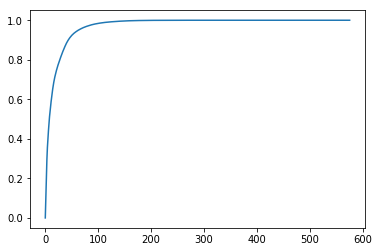

117
(14088, 576) (14088, 117)
save_path:  ../data/g/data_G_
(8056, 522)
True


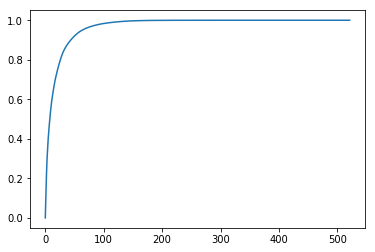

117
(8056, 522) (8056, 117)
save_path:  ../data/g/data_G_dropped_samples_
(14098, 266)
True


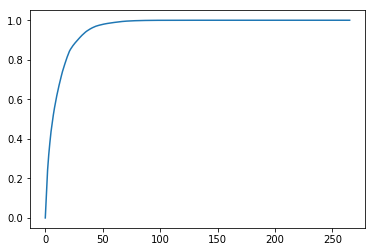

62
(14098, 266) (14098, 62)
save_path:  ../data/f/data_F_
(2801, 215)
True


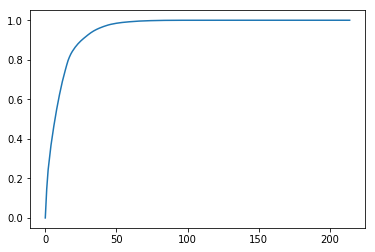

56
(2801, 215) (2801, 56)
save_path:  ../data/f/data_F_dropped_samples_
(14098, 178)
True


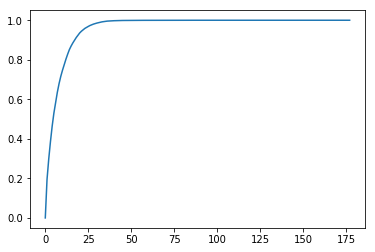

33
(14098, 178) (14098, 33)
save_path:  ../data/o/data_O_
(19, 42)
True


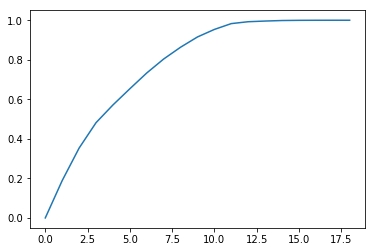

12
(19, 42) (19, 12)
save_path:  ../data/o/data_O_dropped_samples_


In [154]:
for path in paths_list:
    data = load_path(path)
    
    print(check_data(data))
    data_pca = do_PCA(data)
    
    print(data.shape, data_pca.shape)
    
    print("save_path: ",path + "_")
    np.save(path + "_pca_99", data_pca)
    np.save(path, data)

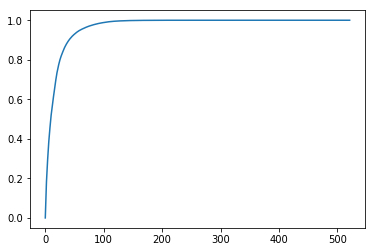

104


In [34]:
data_pca_99 = do_PCA(d)

In [63]:
 = pca.transform(data_norm)[:,:111]

In [83]:
np.save("../data/g/pca_drop_na_99", data_pca_99)

0.0008556710032305947